<a href="https://colab.research.google.com/github/eric-nguyen13/DS-3001/blob/main/DS3001_Group_2_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Project 2 - Stroke
**Group 2: Elaine Zhang, Eric Nguyen,**
  - zzb2rf, wvu9cs,
  - Any questions or comments about this report should be directted to the authors.

---


In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning:
  - In this section...

Variables
- **age**: Patient age, numeric
- **avg_glucose_level**: Blood sugar levels, numeric
- **bmi**: Body mass index, numeric
- **ever_married**: Ever married, dummy/character (Yes, No)
- **gender**: Male, Female, or Other, character
- **heart_disease**: Has heart disease, dummy
- **hypertension**: Has hypertension, dummy
- **id**: Study identification number
- **Residence_type**: Type of residence, dummy/character (Urban, Rural)
- **smoking_status**: Former, never, or current smoker, categorical
- **work_type**: Employment type (Never worked (Never_worked), homemaker ("children"), Public sector employment (Govt_job), Private sector employment (Private), Self-employed (Self-employed)
- **stroke**: Suffered a stroke in the sample period

In [ ]:
training_data = pd.read_csv('training_data.csv')
testing_data = pd.read_csv('testing_data.csv')
training_data.columns

Index(['Unnamed: 0', 'id', 'gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
print('Training size', training_data.shape)
print('Testing size', testing_data.shape)

Training size (4087, 13)
Testing size (1023, 13)


In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4087 entries, 0 to 4086
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4087 non-null   int64  
 1   id                 4087 non-null   int64  
 2   gender             4087 non-null   object 
 3   age                4087 non-null   float64
 4   hypertension       4087 non-null   int64  
 5   heart_disease      4087 non-null   int64  
 6   ever_married       4087 non-null   object 
 7   work_type          4087 non-null   object 
 8   Residence_type     4087 non-null   object 
 9   avg_glucose_level  4087 non-null   float64
 10  bmi                3928 non-null   float64
 11  smoking_status     4087 non-null   object 
 12  stroke             4087 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 415.2+ KB


In [ ]:
# Missing values?
print("Training NaN --")
nan_details = training_data.isnull().sum()
for column, value in nan_details.items():
  if (value != 0):
    print(column, value)

print("Testing NaN --")
nan_details = testing_data.isnull().sum()
for column, value in nan_details.items():
  if (value != 0):
    print(column, value)

Training NaN --
bmi 159
Testing NaN --
bmi 42


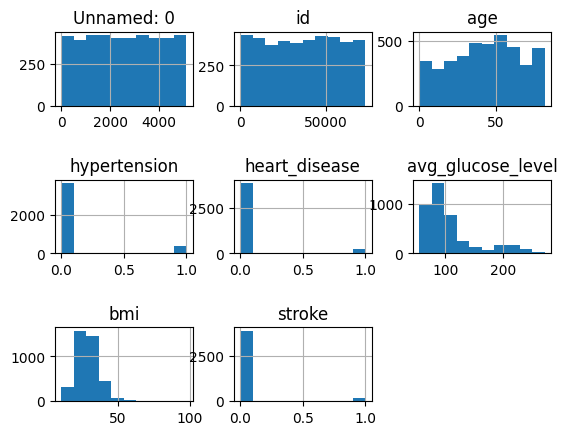

In [ ]:
# looking at the spread
training_data.hist()
plt.subplots_adjust(hspace=1)
plt.show()

In [ ]:
# drop Unamed: 0 because don't know what that column is
# drop id, because the id of the person should have no impact on the model
training_data = training_data.drop(columns=['Unnamed: 0', 'id'])
testing_data = testing_data.drop(columns=['Unnamed: 0', 'id'])

In [ ]:
training_data['heart_disease'].unique()

array([0, 1])

In [ ]:
# Make hypertension, stroke, heart_disease categorical because they are binary labels
binary_columns = ['hypertension', 'heart_disease', 'stroke']
training_data[binary_columns] = training_data[binary_columns].astype('object')
testing_data[binary_columns] = testing_data[binary_columns].astype('object')

In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4087 entries, 0 to 4086
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4087 non-null   object 
 1   age                4087 non-null   float64
 2   hypertension       4087 non-null   object 
 3   heart_disease      4087 non-null   object 
 4   ever_married       4087 non-null   object 
 5   work_type          4087 non-null   object 
 6   Residence_type     4087 non-null   object 
 7   avg_glucose_level  4087 non-null   float64
 8   bmi                3928 non-null   float64
 9   smoking_status     4087 non-null   object 
 10  stroke             4087 non-null   object 
dtypes: float64(3), object(8)
memory usage: 351.4+ KB


## Data Visualization
  - In this section...

## Models
  - In this section... (Cheryl and Hieu summarize this part)

In [ ]:
# split data into features and the target labels
X_train = training_data.drop(columns=['stroke'])
y_train = training_data["stroke"].copy()

X_test = testing_data.drop(columns=['stroke'])
y_train = testing_data["stroke"].copy()

In [ ]:
training_num = X_train.select_dtypes(include=[np.number])
training_cat = X_train.select_dtypes(exclude=[np.number])
num_attribs = list(training_num)
cat_attribs = list(training_cat)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("std_scaler", StandardScaler()),

])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown="infrequent_if_exist"), cat_attribs),
])

X_train_prepared = full_pipeline.fit_transform(X_train)